Importing all the needed packages

In [74]:
from tqdm import tqdm
import winsound
import numpy as np
import pylab as pl
import astropy.units as u
from galpy.orbit import Orbit
import galpy.util.coords as coords
from galpy.potential import MWPotential2014

Creating the velocity ellipsoid for white dwarfs (Table 2 from [Torres et al. 2019, MNRAS, 485, 5573-5589](https://ui.adsabs.harvard.edu/abs/2019MNRAS.485.5573T/abstract)), then plotting a random selection of velocities in a Toomre diagram, and convering one for each into cylindrical coordinates:

[13.83999663  3.7356886  21.09889251]
[-108.02803361  -45.85434417  -10.55652421]
[-19.9946091  -63.20162463  59.04510683]
C:\Users\SOPORTE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt

C:\Users\SOPORTE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt

C:\Users\SOPORTE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt



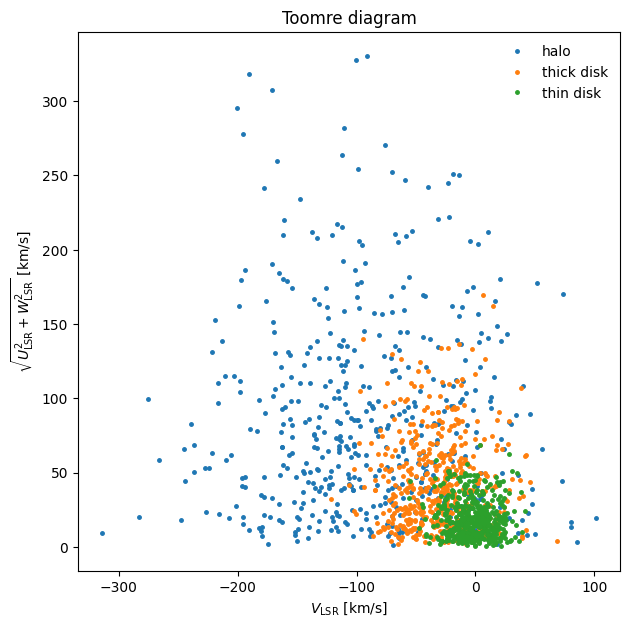

In [75]:
N = 500 #Number of WD of each class (thin, thick, halo)

# velocity ellipsoid
#UVW_thin = np.array([[2.5,22.5],[-1.4,17.4],[0,0]])
UVW_thin = np.array([[2.5,22.5],[-1.4,17.4],[2.6,16.2]])
UVW_thick = np.array([[-18.6,50.4],[-30.0,29.3],[1.1,33.1]])
UVW_halo = np.array([[-27.3,100.8],[-92.3,67.4],[3.4,66.9]])

nUVW_thin = np.random.normal(UVW_thin[:,0],UVW_thin[:,1],(N,3))
nUVW_thick = np.random.normal(UVW_thick[:,0],UVW_thick[:,1],(N,3))
nUVW_halo = np.random.normal(UVW_halo[:,0],UVW_halo[:,1],(N,3))

print(nUVW_thin[0])
print(nUVW_thick[0])
print(nUVW_halo[0])

fig = pl.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(111)

ax1.set_title("Toomre diagram")
ax1.plot(nUVW_halo[:,1],np.sqrt(nUVW_halo[:,0]**2 + nUVW_halo[:,2]), marker='.', ms=5, ls='none', label='halo')
ax1.plot(nUVW_thick[:,1],np.sqrt(nUVW_thick[:,0]**2 + nUVW_thick[:,2]), marker='.', ms=5, ls='none', label='thick disk')
ax1.plot(nUVW_thin[:,1],np.sqrt(nUVW_thin[:,0]**2 + nUVW_thin[:,2]), marker='.', ms=5, ls='none', label='thin disk')

ax1.set_xlabel(r'$V_{\rm LSR}$ [km/s]')
ax1.set_ylabel(r'$\sqrt{U^2_{\rm LSR} + W^2_{\rm LSR}}$ [km/s]')

pl.legend(frameon=False)


pl.show()


# A spatial distribution is created
XYZ = [8.030,0.0,0.025] # Center of the spatial distribution Kpc

rand3 = np.random.rand(N)
rand4 = np.random.rand(N)
rand5 = np.random.rand(N)

R= 0.1 # 100 parsecs
phi = 2*180*rand3 #
theta = np.arccos(2*rand4-1)
r = R*np.cbrt(rand5)

x = r*np.sin(theta)*np.cos(phi) + XYZ[0]
y = r*np.sin(theta)*np.sin(phi) + XYZ[1]
z = r*np.cos(theta) + XYZ[2]


RTZ_thin = np.transpose(coords.rect_to_cyl(x, y, z))
vRTZ_thin = np.transpose(coords.rect_to_cyl_vec(nUVW_thin[:,0], nUVW_thin[:,1],nUVW_thin[:,2], x, y, z ,cyl=False))

RTZ_thick = np.transpose(coords.rect_to_cyl(x, y, z))
vRTZ_thick = np.transpose(coords.rect_to_cyl_vec(nUVW_thick[:,0],nUVW_thick[:,1],nUVW_thick[:,2],x, y,z , cyl=False))

RTZ_halo = np.transpose(coords.rect_to_cyl(x, y, z))
vRTZ_halo = np.transpose(coords.rect_to_cyl_vec(nUVW_halo[:,0],nUVW_halo[:,1],nUVW_halo[:,2], x, y, z, cyl=False)) # que significa cyl


We create three orbits for thin-disk, thick-disk, and halo white dwarfs, respectively. Then we create an array of timesteps
And finally we integrate the orbits.

In [76]:

R0, z0, V0, v_sun = 8.122*u.kpc, 0.0208*u.kpc, 235.*u.km/u.s, [12.9, 10.6, 7.78]*u.km / u.s

star_thin = np.transpose([RTZ_thin[:,0]/8.,  vRTZ_thin[:,0]/220, 1+vRTZ_thin[:,1]/220,  RTZ_thin[:,2]/8,  vRTZ_thin[:,2]/220,  RTZ_thin[:,1]])

star_thick = np.transpose([RTZ_thick[:,0]/8.,vRTZ_thick[:,0]/220, 1+vRTZ_thick[:,1]/220,RTZ_thick[:,2]/8,vRTZ_thick[:,2]/220,RTZ_thick[:,1]])

star_halo = np.transpose([RTZ_halo[:,0]/8.,vRTZ_halo[:,0]/220, 1+vRTZ_halo[:,1]/220,RTZ_halo[:,2]/8,vRTZ_halo[:,2]/220,RTZ_halo[:,1]])

tf = 2 # Gyr
ts = np.linspace(0,tf,100)*u.Gyr 

o_thin = Orbit(star_thin , ro=R0, zo=z0, vo=V0, solarmotion=v_sun)

o_thin.integrate(ts,MWPotential2014)


o_thick = Orbit(star_thick, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
o_thick.integrate(ts,MWPotential2014)

o_halo = Orbit(star_halo, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
o_halo.integrate(ts,MWPotential2014)

# printing eccentricity and angular momentum (z component)
# print('e = ', o_thin.e() , 'Lz = ', o_thin.Lz(quantity=True))
# print('e = ', round(o_thick.e(),3), 'Lz = ', o_thick.Lz(quantity=True))
# print('e = ', round(o_halo.e(),3), 'Lz = ', o_halo.Lz(quantity=True))


In [77]:

# Play sound when this line is executed
winsound.PlaySound("sound.wav", winsound.SND_FILENAME)
winsound.PlaySound("sound.wav", winsound.SND_FILENAME)
winsound.PlaySound("sound.wav", winsound.SND_FILENAME)

Plotting angluar momentum vs eccentricity

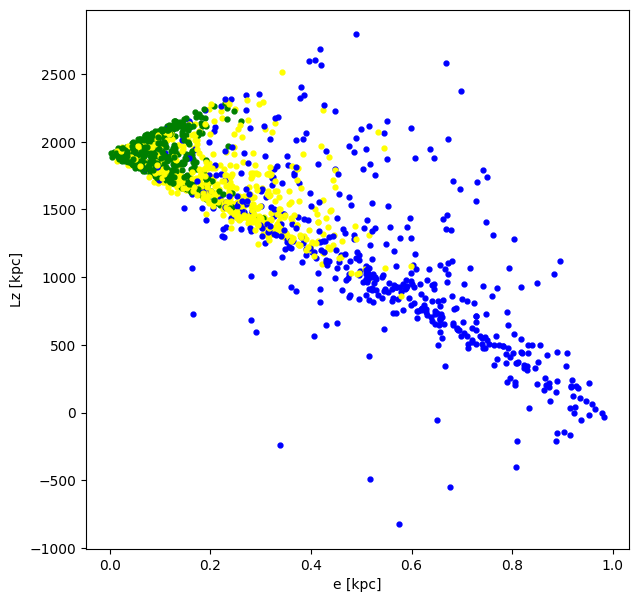

In [78]:
fig = pl.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(111)


for i in range(len(o_halo.e())):
    ax1.plot(o_halo.e()[i], o_halo.Lz()[i], marker='.', ms=7 ,color = 'blue')
    ax1.plot(o_thick.e()[i], o_thick.Lz()[i],  marker='.', ms=7,color = 'yellow')
    ax1.plot(o_thin.e()[i], o_thin.Lz()[i], marker='.', ms=7, color='green')


ax1.set_xlabel('e [kpc]')
ax1.set_ylabel('Lz [kpc]')


pl.show()

Compare the relations among orbital parameters (apocentre, pericentre, periods, Zmax, e, Lz) for both the
simulated white dwarfs belonging to the thin- and thick-disk, and halo

In [79]:
# As eccentricity increase the perihcentr is 
#closer to the center of the galaxy and the 
#apocentre is farther away from the center of the galaxy. we should show this relation
o_thin.zmax()
o_thin.rperi()
o_thin.rap()
#o_thin.period?


array([ 8.72208733,  8.86237483,  8.35547922, 10.0843313 , 10.71888295,
        9.2236232 ,  8.26770318,  9.21635956,  8.37509362,  9.58630737,
        8.50663476,  8.56782648, 11.57081156, 10.55152088,  8.79263296,
        9.71916352, 10.65060009, 11.40376569,  9.01814059,  9.141672  ,
        9.42995792,  8.13400887,  8.38879855,  8.21774054,  8.80246763,
        8.25243986,  9.80557834,  8.66769441,  8.11744182,  8.09318494,
       10.27873753,  8.15041357,  8.19262711,  8.11673738,  8.67716619,
        8.16731983,  8.18239843,  8.20568564, 10.69234803,  8.33167381,
        8.27213059,  9.21886064, 10.54831339,  8.23751486,  8.65625241,
        9.08177213,  8.33521939,  8.50305171,  8.8569971 ,  8.26437395,
       11.58908746,  8.24988974,  8.41353231,  8.78695989,  9.14744843,
       10.39329329,  8.54089451,  9.49382214,  8.48054017, 10.09940723,
        8.12413333, 10.03776757,  9.24669912,  9.44470349,  8.15112242,
        9.7335276 ,  8.19219177,  8.6950096 ,  8.40739603,  9.40

Histograma de la distribución espacial de los objetos 

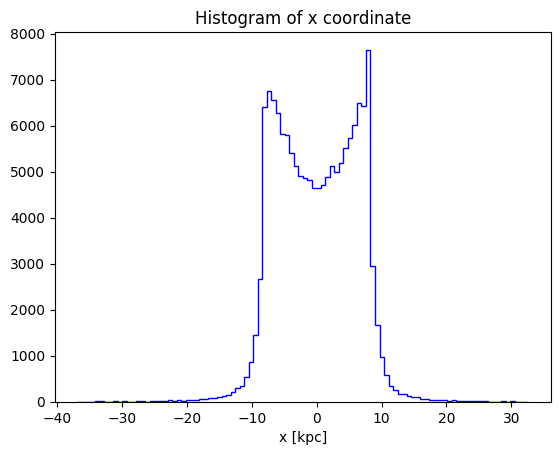

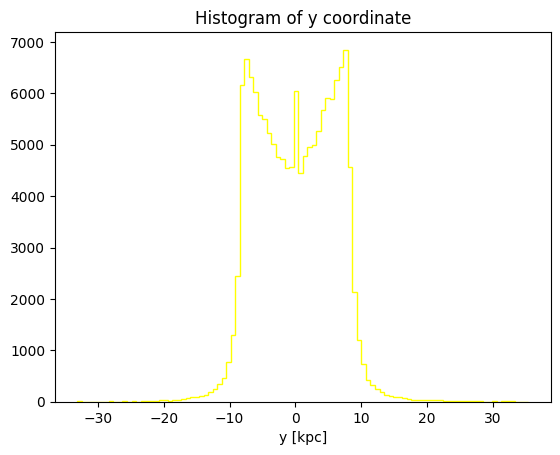

Text(0.5, 0, 'z [kpc]')

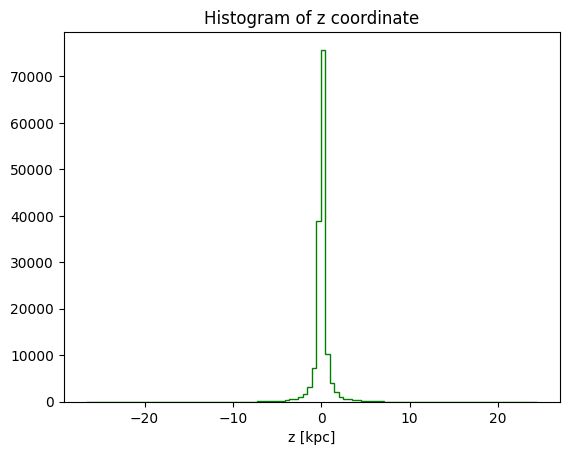

In [80]:

x_thin = o_thin.x(ts).flatten()
x_thick = o_thick.x(ts).flatten()
x_halo = o_halo.x(ts).flatten()

y_thin = o_thin.y(ts).flatten()
y_thick = o_thick.y(ts).flatten()
y_halo = o_halo.y( ts).flatten()

z_thin = o_thin.z( ts).flatten()
z_thick = o_thick.z(ts).flatten()
z_halo = o_halo.z(ts).flatten()

a = np.concatenate((x_thin,x_thick,x_halo))
b = np.concatenate((y_thin,y_thick,y_halo)) 
c = np.concatenate((z_thin,z_thick,z_halo)) 

pl.hist(a, bins=100, histtype='step', color='blue')
pl.title('Histogram of x coordinate')
pl.xlabel('x [kpc]')
pl.show()

pl.hist(b, bins=100, histtype='step', color='yellow')
pl.title('Histogram of y coordinate')
pl.xlabel('y [kpc]')

pl.show()

pl.hist(c, bins=100, histtype='step', color='green')
pl.title('Histogram of z coordinate')
pl.xlabel('z [kpc]')



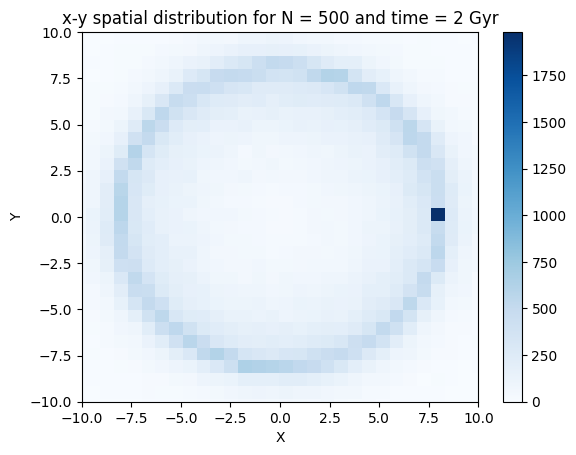

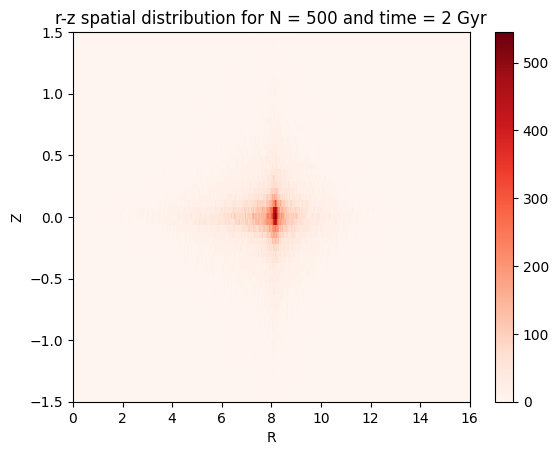

In [90]:
# Assuming you have two arrays x and y containing the data
bins = 100
pl.hist2d(a, b, bins=bins, cmap='Blues')
pl.xlabel('X')
pl.ylabel('Y')
pl.title(f'x-y spatial distribution for N = {N} and time = {tf} Gyr')
pl.colorbar()
pl.xlim(-10, 10)
pl.ylim(-10, 10)
pl.show()

# Histogram for b and c
bins = 1000
pl.hist2d((a**2+b**2)**(1/2),c , bins=bins, cmap='Reds')
pl.xlabel('R')
pl.ylabel('Z')
pl.title(f'r-z spatial distribution for N = {N} and time = {tf} Gyr')
pl.colorbar()
pl.xlim(0, 16)
pl.ylim(-1.5, 1.5)
pl.show()





In [82]:
# fig = pl.figure(figsize=(14,6))
# fig.subplots_adjust(wspace=0.3)
# ax1 = fig.add_subplot(121)

# for i in range(len(o_halo.R(ts,quantity=True))):

#     ax1.plot(o_halo.R(ts,quantity=True)[i],o_halo.z(ts,quantity=True)[i], color = 'blue')
#     ax1.plot(o_thick.R(ts,quantity=True)[i],o_thick.z(ts,quantity=True)[i], color = 'yellow')
#     ax1.plot(o_thin.R(ts,quantity=True)[i],o_thin.z(ts,quantity=True)[i], color='green')


# ax1.set_xlabel('R [kpc]')
# ax1.set_ylabel('Z [kpc]')


# ax2 = fig.add_subplot(122)

# for i in range(len(o_halo.y())):
#     ax2.plot(o_halo.y(ts,quantity=True)[i],o_halo.x(ts,quantity=True)[i], color = 'blue')
#     ax2.plot(o_thick.y(ts,quantity=True)[i],o_thick.x(ts,quantity=True)[i],  color = 'yellow')
#     ax2.plot(o_thin.y(ts,quantity=True)[i],o_thin.x(ts,quantity=True)[i],  color = 'green')

# ax2.set_xlabel('Y [kpc]')
# ax2.set_ylabel('X [kpc]')
# pl.legend(frameon=False)
# ax2.invert_xaxis()
# ax2.invert_yaxis()

# pl.show()


In [83]:
# fig = pl.figure(figsize=(5,5))
# fig.subplots_adjust(wspace=0.3)
# ax1 = fig.add_subplot(projection='3d')

# for i in range(len(o_halo.y())):
#     ax1.plot(o_halo.y(ts,quantity=True)[i],o_halo.x(ts,quantity=True)[i], o_halo.x(ts,quantity=True)[i], color='blue')
#     ax1.plot(o_thick.y(ts,quantity=True)[i],o_thick.x(ts,quantity=True)[i], o_thick.x(ts,quantity=True)[i], color='yellow')
#     ax1.plot(o_thin.y(ts,quantity=True)[i],o_thin.x(ts,quantity=True)[i], o_thin.x(ts,quantity=True)[i],color='green')


# ax1.set_xlabel('Y [kpc]')
# ax1.set_ylabel('X [kpc]')
# ax1.set_zlabel('Z [kpc]')

# ax1.invert_xaxis()
# ax1.invert_yaxis()
# pl.show()

Integrating for longer and plotting the orbits

In [84]:
# ts = np.linspace(0,2,10000)*u.Gyr


# o_thin.integrate(ts,MWPotential2014)

# o_thick.integrate(ts,MWPotential2014)

# o_halo.integrate(ts,MWPotential2014)



# fig = pl.figure(figsize=(14,6))
# fig.subplots_adjust(wspace=0.3)
# ax1 = fig.add_subplot(121)

# for i in range(len(o_halo.R())):
#     ax1.plot(o_halo.R(ts,quantity=True)[i],o_halo.z(ts,quantity=True)[i], color='blue')
#     ax1.plot(o_thick.R(ts,quantity=True)[i],o_thick.z(ts,quantity=True)[i], color='orange')
#     ax1.plot(o_thin.R(ts,quantity=True)[i],o_thin.z(ts,quantity=True)[i], color='green')

# ax1.set_xlabel('R [kpc]')
# ax1.set_ylabel('Z [kpc]')


# ax2 = fig.add_subplot(122)

# for i in range(len(o_halo.R())):  
#     ax2.plot(o_halo.y(ts,quantity=True)[i],o_halo.x(ts,quantity=True)[i], color='blue')
#     ax2.plot(o_thick.y(ts,quantity=True)[i],o_thick.x(ts,quantity=True)[i], color='orange')
#     ax2.plot(o_thin.y(ts,quantity=True)[i],o_thin.x(ts,quantity=True)[i], color='green')

# ax2.set_xlabel('Y [kpc]')
# ax2.set_ylabel('X [kpc]')

# pl.legend(frameon=False)

# ax2.invert_yaxis()
# pl.show()




Plotting the Galactic radial velocity component:

In [85]:

# fig = pl.figure(figsize=(7,7))
# fig.subplots_adjust(wspace=0.3)
# ax1 = fig.add_subplot(111)

# for i  in range(len(o_halo.R())):  
#     ax1.plot(o_halo.R(ts,quantity=True)[i],o_halo.vR(ts,quantity=True)[i], color='blue')
#     ax1.plot(o_thick.R(ts,quantity=True)[i],o_thick.vR(ts,quantity=True)[i], color='orange')
#     ax1.plot(o_thin.R(ts,quantity=True)[i],o_thin.vR(ts,quantity=True)[i], color='green')


# ax1.set_xlabel('R [kpc]')
# ax1.set_ylabel('vR [km/s]')
# pl.show()
